<a href="https://colab.research.google.com/github/Phatdeluxe/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# Followed along with everything except for the working with dates section, but 
# I typed it all out anyway because it is nice working with cleaner data

In [0]:
import pandas as pd

In [4]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-09-06 14:16:23--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   839KB/s    in 27s     

2019-09-06 14:16:50 (833 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]



In [5]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [6]:
df = pd.read_csv('LoanStats_2018Q4.csv', skipfooter=2, header=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.000000,2261.00,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.960000,1081.96,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.960000,895.96,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,23000,23000,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.450000,4307.45,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000,8000,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.850000,2163.85,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,32075,32075,32075.0,60 months,11.80%,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,29228.12,29228.12,4940.280000,4940.28,...,50.0,0,0,360433,56635,20000,80125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Ho

In [8]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128386
hardship_type                                 128385
hardship_last_payment_amount                  128385
hardship_payoff_balance_amount                128385
hardship_reason                               128385
hardship_loan_status                          128385
hardship_dpd                                  128385
hardship_length                               128385
payment_plan_start_date                       128385
hardship_end_date                             128385
hardship_start_date                           128385
hardship_amount                               128385
deferral_term                                 128385
hardship_status                               128385
settlement_percentage                         

In [0]:
dfCopy1 = df.drop(columns=['id', 'member_id', 'desc', 'url'])

In [112]:
dfCopy1.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.000000,2261.00,1710.70,550.30,0.0,0.0,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.960000,1081.96,576.62,505.34,0.0,0.0,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.960000,895.96,543.83,352.13,0.0,0.0,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23000,23000,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.450000,4307.45,1646.84,2660.61,0.0,0.0,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,8000,8000,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.850000,2163.85,1153.17,1010.68,0.0,0.0,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,32075,32075,32075.0,60 months,11.80%,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,29228.12,29228.12,4940.280000,4940.28,2846.88,2093.40,0.0,0.0,...,50.0,0,0,360433,56635,20000,80125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MOR

In [0]:
def removePercentToFloat(string):
  return float(string.strip('%'))

dfCopy1['int_rate'] = dfCopy1['int_rate'].apply(removePercentToFloat)

In [114]:
dfCopy1['int_rate'].dtype

dtype('float64')

In [0]:
import numpy as np

In [0]:
def cleanTitle(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
  
dfCopy1['emp_title'] = dfCopy1['emp_title'].apply(cleanTitle)

In [117]:
dfCopy1['emp_title'].value_counts()

Unknown                               20947
Teacher                                2557
Manager                                2395
Registered Nurse                       1418
Driver                                 1258
Supervisor                             1160
Truck Driver                            920
Rn                                      834
Office Manager                          805
Sales                                   803
General Manager                         791
Project Manager                         720
Owner                                   625
Director                                523
Operations Manager                      518
Sales Manager                           500
Police Officer                          440
Nurse                                   425
Technician                              420
Engineer                                412
Administrative Assistant                409
Store Manager                           398
Mechanic                        

In [0]:
dfCopy1['emp_title_manager'] = False

In [0]:
dfCopy1['emp_title_manager'] = dfCopy1['emp_title'].str.contains('Manager')

In [0]:
manager = dfCopy1[dfCopy1['emp_title'].str.contains('Manager') == True]

In [121]:
manager.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,0.0,0.0,...,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
23,3300,3300,3300.0,36 months,23.40,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,2824.26,2824.26,892.64,892.64,475.74,416.90,0.0,0.0,...,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,2.40,0,Nov-2004,1,NaN,NaN,1,0,0,NaN,9,w,1690.04,1690.04,502.96,502.96,309.96,193.00,0.0,0.0,...,0,0,854,854,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
37,8000,8000,8000.0,36 months,11.80,264.96,B,B4,Program Manager,7 years,MORTGAGE,85000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,366xx,AL,23.61,0,Dec-1991,1,NaN,NaN,11,0,29038,47.2%,29,w,6656.84,6656.84,1846.85,1846.85,1343.16,503.69,0.0,0.0,...,0,0,151710,103435,45700,90210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
48,16500,16500,16500.0,60 months,17.97,418.73,D,D1,Case Manager,5 years,MORTGAGE,37000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,775xx,TX,52.09,0,Oct-2001,1,NaN,NaN,9,0,10606,82.9%,18,w,15243.15,15243.15,2947.59,2947.59,1256.85,1690.74,0.0,0.0,...,0,0,155305,81106,7800,94643,18602.0,Jan-2005,1.0,1.0,8.0,86.6,2.0,8.0,0.0,0.0,46.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [0]:
nonManager = dfCopy1[dfCopy1['emp_title_manager'] == False]

In [0]:
# help(df.plot)

In [0]:
# manager['int_rate'].plot.bar();

# Absolutely horrendous, just messing around with the different plot types pandas has to offer

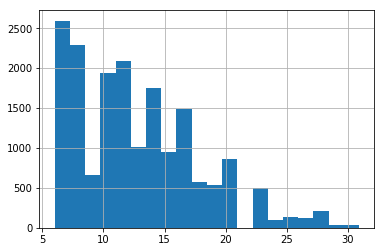

In [125]:
manager['int_rate'].hist(bins=20);

In [0]:
# manager['int_rate'].plot.pie()

In [127]:
dfCopy1['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
5         Dec-2018
6         Dec-2018
7         Dec-2018
8         Dec-2018
9         Dec-2018
10        Dec-2018
11        Dec-2018
12        Dec-2018
13        Dec-2018
14        Dec-2018
15        Dec-2018
16        Dec-2018
17        Dec-2018
18        Dec-2018
19        Dec-2018
20        Dec-2018
21        Dec-2018
22        Dec-2018
23        Dec-2018
24        Dec-2018
25        Dec-2018
26        Dec-2018
27        Dec-2018
28        Dec-2018
29        Dec-2018
            ...   
128382    Oct-2018
128383    Oct-2018
128384    Oct-2018
128385    Oct-2018
128386    Oct-2018
128387    Oct-2018
128388    Oct-2018
128389    Oct-2018
128390    Oct-2018
128391    Oct-2018
128392    Oct-2018
128393    Oct-2018
128394    Oct-2018
128395    Oct-2018
128396    Oct-2018
128397    Oct-2018
128398    Oct-2018
128399    Oct-2018
128400    Oct-2018
128401    Oct-2018
128402    Oct-2018
128403    Oc

In [0]:
dfCopy1['issue_d'] = pd.to_datetime(dfCopy1['issue_d'], infer_datetime_format=True)

In [129]:
dfCopy1.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [130]:
dfCopy1['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [131]:
dfCopy1['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
          ..
128382    10
128383    10
128384    10
128385    10
128386    10
128387    10
128388    10
128389    10
128390    10
128391    10
128392    10
128393    10
128394    10
128395    10
128396    10
128397    10
128398    10
128399    10
128400    10
128401    10
128402    10
128403    10
128404    10
128405    10
128406    10
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_d, Length: 128412, dtype: int64

In [0]:
dfCopy1['issue_year'] = dfCopy1['issue_d'].dt.year
dfCopy1['issue_month'] = dfCopy1['issue_d'].dt.month

In [133]:
dfCopy1[['issue_year', 'issue_month']].head(20)

,issue_year,issue_month
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12
5,2018,12
6,2018,12
7,2018,12
8,2018,12
9,2018,12


In [0]:
dfCopy1['earliest_cr_line'] = pd.to_datetime(dfCopy1['earliest_cr_line'], infer_datetime_format=True)

In [135]:
dfCopy1['issue_d'] - dfCopy1['earliest_cr_line']

0         8370 days
1         4474 days
2         2801 days
3         7973 days
4         8735 days
5         4870 days
6         5509 days
7        11506 days
8         6453 days
9         4870 days
10        4992 days
11        4809 days
12        3013 days
13        7001 days
14        4232 days
15        5570 days
16        5174 days
17        2983 days
18        4901 days
19        6512 days
20        5113 days
21        6270 days
22        5844 days
23        4413 days
24        7031 days
25        4474 days
26        8157 days
27        6574 days
28        4686 days
29        5935 days
            ...    
128382    2861 days
128383    6848 days
128384    6757 days
128385    4048 days
128386    6178 days
128387    2952 days
128388    7032 days
128389    9070 days
128390    4505 days
128391    7853 days
128392    5327 days
128393    4505 days
128394    4990 days
128395    7062 days
128396    7123 days
128397   10045 days
128398    3987 days
128399    5601 days
128400    4748 days


In [136]:
dfCopy1['days_from_earliest_credit_to_issue'] = (dfCopy1['issue_d'] - dfCopy1['earliest_cr_line']).dt.days
dfCopy1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,...,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8370
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,2006-09-01,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,...,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,4474
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,1997-02-01,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.45,4307.45,1646.84,2660.61,0.0,0.0,...,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,7973
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,1995-01-01,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,0.0,0.0,...,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12,8735


In [137]:
dfCopy1['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [138]:
25171./365.25

68.91444216290212

In [139]:
# Convert the term column from string to integer.
dfCopy1['term'].isnull().sum()

0

In [140]:
# Quick test for removing the word ' months'

stringTest = '12 months'

int(stringTest.strip(' months'))

12

In [0]:
# Removes the ' months' off the back of the string then typecasts to int

def strToInt(string):
  return int(string.strip(' months'))

dfCopy1['term'] = dfCopy1['term'].apply(strToInt)

In [142]:
dfCopy1['term'].head()

0    36
1    36
2    36
3    60
4    36
Name: term, dtype: int64

In [0]:
# Make a column named loan_status_is_great. It should contain the integer 1 if
# loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
# Making the new column and initializing it

dfCopy1['loan_status_is_great'] = 0

In [145]:
# Making sure the above worked

dfCopy1['loan_status_is_great']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
128382    0
128383    0
128384    0
128385    0
128386    0
128387    0
128388    0
128389    0
128390    0
128391    0
128392    0
128393    0
128394    0
128395    0
128396    0
128397    0
128398    0
128399    0
128400    0
128401    0
128402    0
128403    0
128404    0
128405    0
128406    0
128407    0
128408    0
128409    0
128410    0
128411    0
Name: loan_status_is_great, Length: 128412, dtype: int64

In [0]:
# Function to add a 1 or a 0 to loan_status_is_great depending on the presence of 'current' or 'fully paid'

def loanStatusPaid(loan):
  if loan == 'Current' or loan == 'Fully Paid':
    return 1
  else:
    return 0

dfCopy1['loan_status_is_great'] = dfCopy1['loan_status'].apply(loanStatusPaid)

In [147]:
# Checking to see if the above worked

dfCopy1['loan_status_is_great'].value_counts()

1    122513
0      5899
Name: loan_status_is_great, dtype: int64

In [0]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.

In [0]:
# Making the columns and initializing them

dfCopy1['last_pymnt_d_month'] = 0
dfCopy1['last_pymnt_d_year'] = 0

In [0]:
# Changing 'last_pmynt_d' to a datetime format

dfCopy1['last_pymnt_d'] = pd.to_datetime(dfCopy1['last_pymnt_d'], infer_datetime_format=True)

In [151]:
# Making sure above worked

dfCopy1['last_pymnt_d']

0        2019-07-01
1        2019-07-01
2        2019-06-01
3        2019-07-01
4        2019-07-01
5        2019-07-01
6        2019-08-01
7        2019-07-01
8        2019-05-01
9        2019-07-01
10       2019-07-01
11       2019-07-01
12       2019-07-01
13       2019-07-01
14       2019-07-01
15       2019-08-01
16       2019-08-01
17       2019-07-01
18       2019-07-01
19       2019-04-01
20       2019-07-01
21       2019-07-01
22       2019-07-01
23       2019-07-01
24       2019-07-01
25       2019-07-01
26       2019-07-01
27       2019-07-01
28       2019-07-01
29       2019-07-01
            ...    
128382   2019-08-01
128383   2019-08-01
128384   2019-08-01
128385   2019-08-01
128386   2019-08-01
128387   2019-08-01
128388   2019-08-01
128389   2019-03-01
128390   2019-06-01
128391   2019-01-01
128392   2019-08-01
128393   2019-08-01
128394   2019-08-01
128395   2019-08-01
128396   2019-08-01
128397   2019-08-01
128398   2019-08-01
128399   2019-08-01
128400   2019-08-01


In [0]:
# Adding the month and year to their respective columns

dfCopy1['last_pymnt_d_month'] = dfCopy1['last_pymnt_d'].dt.month
dfCopy1['last_pymnt_d_year'] = dfCopy1['last_pymnt_d'].dt.year

In [0]:
def toInt(number):
  if number > 0:
    return int(number)
  else:
    return 'No Date Listed'
dfCopy1['last_pymnt_d_year'] = dfCopy1['last_pymnt_d_year'].apply(toInt)
dfCopy1['last_pymnt_d_month'] = dfCopy1['last_pymnt_d_month'].apply(toInt)

In [154]:
dfCopy1['last_pymnt_d_month']

0          7
1          7
2          6
3          7
4          7
5          7
6          8
7          7
8          5
9          7
10         7
11         7
12         7
13         7
14         7
15         8
16         8
17         7
18         7
19         4
20         7
21         7
22         7
23         7
24         7
25         7
26         7
27         7
28         7
29         7
          ..
128382     8
128383     8
128384     8
128385     8
128386     8
128387     8
128388     8
128389     3
128390     6
128391     1
128392     8
128393     8
128394     8
128395     8
128396     8
128397     8
128398     8
128399     8
128400     8
128401     8
128402     8
128403     8
128404     4
128405     8
128406     8
128407    12
128408     8
128409     8
128410     8
128411     8
Name: last_pymnt_d_month, Length: 128412, dtype: object

In [155]:
dfCopy1['last_pymnt_d_year']

0         2019
1         2019
2         2019
3         2019
4         2019
5         2019
6         2019
7         2019
8         2019
9         2019
10        2019
11        2019
12        2019
13        2019
14        2019
15        2019
16        2019
17        2019
18        2019
19        2019
20        2019
21        2019
22        2019
23        2019
24        2019
25        2019
26        2019
27        2019
28        2019
29        2019
          ... 
128382    2019
128383    2019
128384    2019
128385    2019
128386    2019
128387    2019
128388    2019
128389    2019
128390    2019
128391    2019
128392    2019
128393    2019
128394    2019
128395    2019
128396    2019
128397    2019
128398    2019
128399    2019
128400    2019
128401    2019
128402    2019
128403    2019
128404    2019
128405    2019
128406    2019
128407    2018
128408    2019
128409    2019
128410    2019
128411    2019
Name: last_pymnt_d_year, Length: 128412, dtype: object

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

In [159]:
# finding which column has the % symbol

dfCopy1.describe(include=[np.object])
dfCopy1['revol_util'].dtype

dtype('O')

In [160]:
print(dfCopy1['revol_util'].dtypes)

object


In [0]:
def cleanRevol(revol):
  if type(revol) == float:
    return 'No value given'
  else:
    return removePercentToFloat(revol)


dfCopy1['revol_util'] = dfCopy1['revol_util'].apply(cleanRevol)

In [162]:
dfCopy1['revol_util'].head()

0      38
1    19.2
2    19.1
3      13
4    81.3
Name: revol_util, dtype: object

In [163]:
test = '3.54%'
type(dfCopy1.at[10, 'revol_util'])

float

In [0]:
top20 = dict(dfCopy1['emp_title'].value_counts().iloc[1:21])

In [165]:
top20


{'Administrative Assistant': 409,
 'Director': 523,
 'Driver': 1258,
 'Engineer': 412,
 'General Manager': 791,
 'Manager': 2395,
 'Nurse': 425,
 'Office Manager': 805,
 'Operations Manager': 518,
 'Owner': 625,
 'Police Officer': 440,
 'Project Manager': 720,
 'Registered Nurse': 1418,
 'Rn': 834,
 'Sales': 803,
 'Sales Manager': 500,
 'Supervisor': 1160,
 'Teacher': 2557,
 'Technician': 420,
 'Truck Driver': 920}

In [0]:
dfCopy2 = dfCopy1

In [167]:
dfCopy2['emp_title'].head()

0           Unknown
1          Security
2    Administrative
3          Operator
4           Manager
Name: emp_title, dtype: object

In [0]:
def makeOther(title):
  if title in top20.keys():
    return str(title)
  else:
    return 'Other'

dfCopy2['emp_title'] = dfCopy2['emp_title'].apply(makeOther)

In [174]:
dfCopy2['emp_title'].nunique()

21